$\textbf{PROGRAMMING ASSIGNMENT}$
---

Data: https://archive.ics.uci.edu.

Instructions: Choose a dataset of your liking and perform the following:

1. Create a Correlation Plot

2. Check the distribution of each column and determine which probability distiribution it fits.

3. Create a summary statistics.

4. Perform a hypothesis test (Code from scratch).

In [95]:
from ucimlrepo import fetch_ucirepo 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2

In [60]:
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
Y = adult.data.targets 

data = pd.concat([X, Y], axis=1)

In [61]:
print(adult.metadata)

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

In [62]:
print(adult.variables)

              name     role         type      demographic  \
0              age  Feature      Integer              Age   
1        workclass  Feature  Categorical           Income   
2           fnlwgt  Feature      Integer             None   
3        education  Feature  Categorical  Education Level   
4    education-num  Feature      Integer  Education Level   
5   marital-status  Feature  Categorical            Other   
6       occupation  Feature  Categorical            Other   
7     relationship  Feature  Categorical            Other   
8             race  Feature  Categorical             Race   
9              sex  Feature       Binary              Sex   
10    capital-gain  Feature      Integer             None   
11    capital-loss  Feature      Integer             None   
12  hours-per-week  Feature      Integer             None   
13  native-country  Feature  Categorical            Other   
14          income   Target       Binary           Income   

                       

In [63]:
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [64]:
data.fillna('Missing', inplace=True)

categorical_columns = data.select_dtypes(include=['object']).columns

label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

correlation_matrix = data.corr()

mask = np.zeros_like(correlation_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True

df_corr_viz = correlation_matrix.mask(mask).dropna(how='all').dropna(axis=1, how='all')

fig = px.imshow(df_corr_viz, text_auto=True)
fig.update_layout(height=900, width=900)
fig.show()

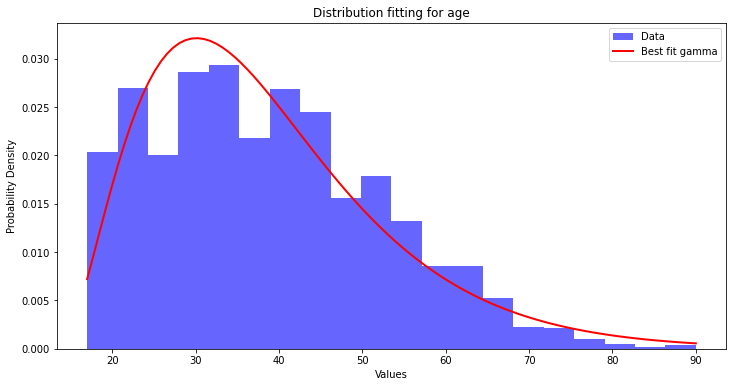

Best fitting distribution for age: gamma
Parameters: (2.9491874540857017, 13.491732718865851, 8.528396451760269)

SKIPPED COLUMN: workclass due to non-numeric data or empty after conversion.


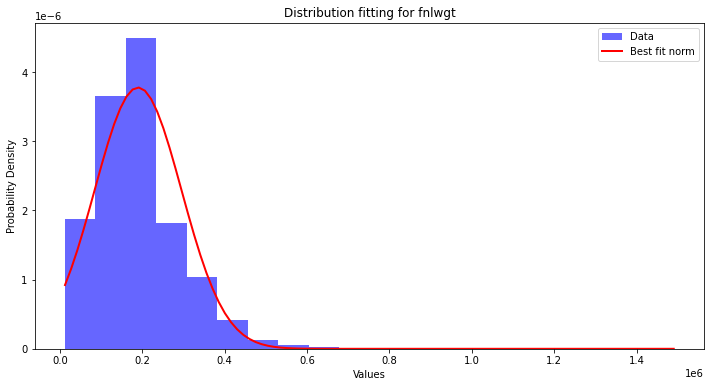

Best fitting distribution for fnlwgt: norm
Parameters: (189664.13459727284, 105602.94433960246)

SKIPPED COLUMN: education due to non-numeric data or empty after conversion.


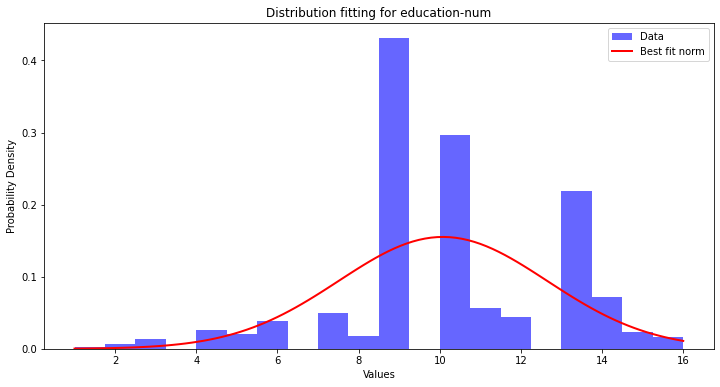

Best fitting distribution for education-num: norm
Parameters: (10.078088530363212, 2.5709464361754084)

SKIPPED COLUMN: marital-status due to non-numeric data or empty after conversion.

SKIPPED COLUMN: occupation due to non-numeric data or empty after conversion.

SKIPPED COLUMN: relationship due to non-numeric data or empty after conversion.

SKIPPED COLUMN: race due to non-numeric data or empty after conversion.

SKIPPED COLUMN: sex due to non-numeric data or empty after conversion.


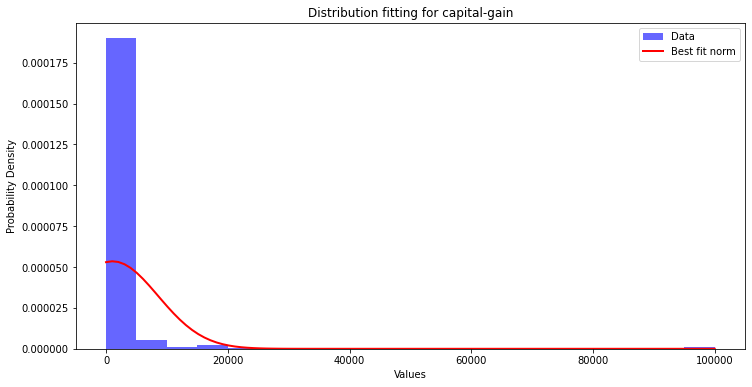

Best fitting distribution for capital-gain: norm
Parameters: (1079.0676262233324, 7451.942770267475)


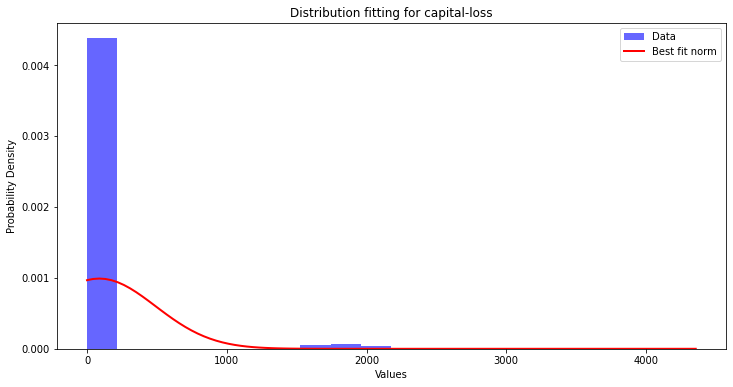

Best fitting distribution for capital-loss: norm
Parameters: (87.50231358257237, 403.0004265089569)


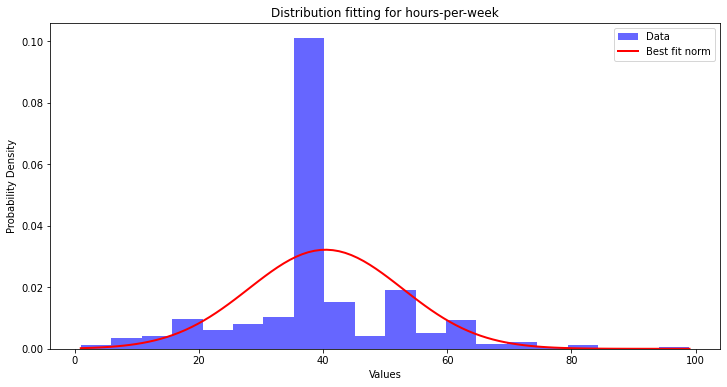

Best fitting distribution for hours-per-week: norm
Parameters: (40.422382375824085, 12.391317171262553)

SKIPPED COLUMN: native-country due to non-numeric data or empty after conversion.

Total distribution counts:
norm: 5
expon: 0
gamma: 1


In [88]:
distributions = ['norm', 'expon', 'gamma']
distribution_counts = {dist_name: 0 for dist_name in distributions}

# Iterating over each column in the DataFrame
for column in X.columns:
    # Convert column to numeric, setting errors='coerce' will turn non-convertible types to NaN
    data = pd.to_numeric(X[column], errors='coerce')
    data = data.dropna()  # Drop NaN values

    if data.empty:
        print(f'\nSKIPPED COLUMN: {column} due to non-numeric data or empty after conversion.')
        continue

    if np.isfinite(data).all():  # Check if all values are finite
        best_fit_name = ''
        best_fit_params = {}
        best_kstest_stat = np.inf

        for dist_name in distributions:
            dist = getattr(stats, dist_name)
            params = dist.fit(data)
            kstest_stat, _ = stats.kstest(data, dist_name, args=params)

            if kstest_stat < best_kstest_stat:
                best_fit_name = dist_name
                best_fit_params = params
                best_kstest_stat = kstest_stat

        distribution_counts[best_fit_name] += 1

        plt.figure(figsize=(12, 6))
        plt.hist(data, bins=20, density=True, alpha=0.6, color='blue', label='Data')

        dist = getattr(stats, best_fit_name)
        x = np.linspace(min(data), max(data), 100)
        pdf = dist.pdf(x, *best_fit_params)
        plt.plot(x, pdf, 'r-', lw=2, label=f'Best fit {best_fit_name}')

        plt.title(f'Distribution fitting for {column}')
        plt.xlabel('Values')
        plt.ylabel('Probability Density')
        plt.legend()
        plt.show()

        print(f'Best fitting distribution for {column}: {best_fit_name}')
        print('Parameters:', best_fit_params)
    else:
        print(f'\nSKIPPED COLUMN: {column} because there are non-finite values')

print('\nTotal distribution counts:')
for dist_name, count in distribution_counts.items():
    print(f'{dist_name}: {count}')

In [89]:
summary_statistics = X.describe()

print(summary_statistics)

                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  48842.000000  4.884200e+04   48842.000000  48842.000000  48842.000000   
mean      38.643585  1.896641e+05      10.078089   1079.067626     87.502314   
std       13.710510  1.056040e+05       2.570973   7452.019058    403.004552   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.175505e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.781445e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.376420e+05      12.000000      0.000000      0.000000   
max       90.000000  1.490400e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    48842.000000  
mean        40.422382  
std         12.391444  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


# Hypothesis Test
### The Correlation Between Race and Education
Null Hypothesis (H0): There is no correlation between race and educational attainment.

Alternative Hypothesis (H1): There is a correlation between race and educational attainment.

In [102]:
data = X.dropna(subset=['race', 'education'])
contingency_table = pd.crosstab(data['race'], data['education'])

row_totals = contingency_table.sum(axis=1)
column_totals = contingency_table.sum(axis=0)
total = contingency_table.values.sum()

expected_counts = pd.DataFrame(
    [[(row_total * column_total) / total for column_total in column_totals]
     for row_total in row_totals],
    index=contingency_table.index,
    columns=contingency_table.columns
)

chi_squared_stat = ((contingency_table - expected_counts) ** 2 / expected_counts).values.sum()

num_rows = contingency_table.shape[0] - 1 
num_columns = contingency_table.shape[1] - 1 
degrees_of_freedom = num_rows * num_columns

# Calculating p_value is apparently impossible (or incredible convoluted) to do manually according to everywhere I've read, so I've resorted to using scipy for this one
p_value = chi2.sf(chi_squared_stat, degrees_of_freedom)

print("Chi-squared Statistic: ", chi_squared_stat)
print("Degrees of Freedom: ", degrees_of_freedom)
print("P-Value: ", p_value, "\n")

if p_value < 0.05:
    print("The null hypothesis is rejected. There is a significant correlation between race and educational attainment, which indicates that these two features are not independent.")
else:
    print("Failed to reject the null hypothesis. There exists no significant correlation between race and educational attainment.")

Chi-squared Statistic:  1040.6622432490265
Degrees of Freedom:  60
P-Value:  1.02163883240024e-178 

The null hypothesis is rejected. There is a significant correlation between race and educational attainment, which indicates that these two features are not independent.
